Finished


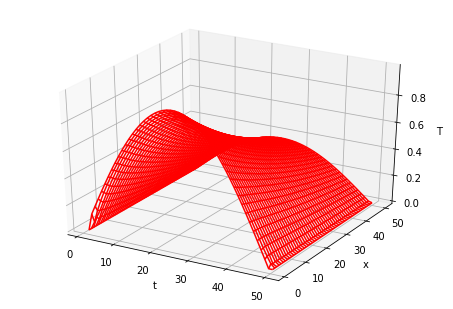

In [2]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# HeatCNTridiag.py:  solution of heat eqtn via CN method

""" Dirichlet boundary conditions surrounding four walls 
 Domain dimensions: WxH, with 2 triangles per square  
 Based on FEM2DL_Box Matlab program in Polycarpou, Intro to the Finite 
 Element Method in Electromagnetics, Morgan & Claypool (2006) """

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;


Max = 51; n   = 50;   m = 50
Ta  = zeros((Max),float); Tb =zeros((Max),float); Tc = zeros((Max),float)
Td  = zeros((Max),float); a = zeros((Max),float); b = zeros((Max),float)
c   = zeros((Max),float); d = zeros((Max),float); x = zeros((Max),float)
t   = zeros( (Max, Max),float)

def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = 51
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n+1):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n+1):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = p[n]
    for i in range( n - 1, 1,-1 ): x[i] = p[i] - h[i]*x[i+1]

width = 1.0; height = 0.1; ct = 1.0                      
for i in range(0, n):   t[i,0]  = 0.0                        
for i in range( 1, m):  t[0][i] = 0.0
h  = width  / ( n - 1 )                 
k  = height / ( m - 1 )
r  = ct * ct * k / ( h * h )

for j in range(1,m+1):
     t[1,j] = 0.0
     t[n,j] = 0.0                                                   # BCs
for i in range( 2, n):   t[i][1] = sin( pi * h *i)                  # ICs
for i in range(1, n+1):  Td[i] = 2. + 2./r
Td[1] = 1.; Td[n] = 1.
for i in range(1,n ): Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal
Ta[n-1] = 0.0;   Tc[1] = 0.0; Tb[1] = 0.0; Tb[n] = 0.0
#print("I'm working hard, wait for fig while I count to 50")

for j in range(2,m+1):
      #print(j)
      for i in range(2,n): Tb[i] = t[i-1][j-1] + t[i+1][j-1] \
                + (2/r-2) * t[i][j-1]
      Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
      for i in range(1, n+1):  t[i][j] = x[i]
print("Finished")
x = list(range(1, m+1))                            # Plot every other x
y = list(range(1, n+1))                                 # every other y
X, Y = p.meshgrid(x,y)               

def functz(t):                                            # Potential
    z = t[X, Y]                 
    return z

Z = functz(t)                          
fig = p.figure()                                           
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color= 'r')                     
ax.set_xlabel('t')                                            
ax.set_ylabel('x')
ax.set_zlabel('T')
p.show()                                               # Display figure 